<a href="https://colab.research.google.com/github/jatins13/IMDb-sentiment-analysis/blob/main/Project_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request as req
import tarfile
import os
from matplotlib import pyplot as plt

imdb_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

save_filename = "aclImdb_v1.tar.gz"
if not os.path.exists(save_filename):
    req.urlretrieve(imdb_url, save_filename)
    
imdb_folder = "aclImdb"
if not os.path.exists(imdb_folder):
    with tarfile.open(save_filename) as tar:
        tar.extractall()

In [2]:
import numpy as np
import re

def get_reviews(data_folder="/train"):
    reviews = []
    labels = []
    train_values = np.array([0,0])
    test_values = np.array([0,0])
    for index,sentiment in enumerate(["/neg/", "/pos/"]):
        path = imdb_folder + data_folder + sentiment
        path_test = imdb_folder + "/test" + sentiment
        for filename in sorted(os.listdir(path)):
            with open(path + filename, 'r') as f:
                review = f.read()
                review = review.lower()
                review = review.replace("<br />", " ")
                review = re.sub(r"[^a-z ]", " ", review)
                review = re.sub(r" +", " ", review)
                review = review.split(" ")
                reviews.append(review)
                
                label = [0, 0]
                label[index] = 1
                labels.append(label)
        list = os.listdir(path) # dir is your directory path
        number_files = len(list)
        train_values[index] = number_files

        list = os.listdir(path_test)
        number_files = len(list)
        test_values[index] = number_files

    return reviews, np.array(labels), train_values, test_values

25000
['story', 'of', 'a', 'man', 'who', 'has', 'unnatural', 'feelings', 'for', 'a', 'pig', 'starts', 'out', 'with', 'a', 'opening', 'scene', 'that', 'is', 'a', 'terrific', 'example', 'of', 'absurd', 'comedy', 'a', 'formal', 'orchestra', 'audience', 'is', 'turned', 'into', 'an', 'insane', 'violent', 'mob', 'by', 'the', 'crazy', 'chantings', 'of', 'it', 's', 'singers', 'unfortunately', 'it', 'stays', 'absurd', 'the', 'whole', 'time', 'with', 'no', 'general', 'narrative', 'eventually', 'making', 'it', 'just', 'too', 'off', 'putting', 'even', 'those', 'from', 'the', 'era', 'should', 'be', 'turned', 'off', 'the', 'cryptic', 'dialogue', 'would', 'make', 'shakespeare', 'seem', 'easy', 'to', 'a', 'third', 'grader', 'on', 'a', 'technical', 'level', 'it', 's', 'better', 'than', 'you', 'might', 'think', 'with', 'some', 'good', 'cinematography', 'by', 'future', 'great', 'vilmos', 'zsigmond', 'future', 'stars', 'sally', 'kirkland', 'and', 'frederic', 'forrest', 'can', 'be', 'seen', 'briefly', '']


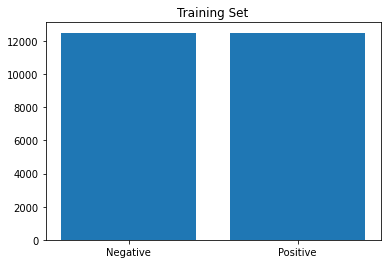

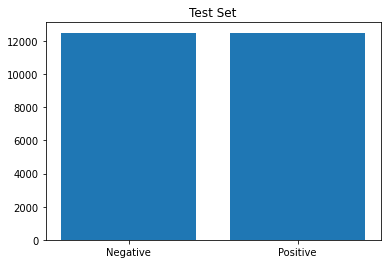

In [ ]:
train_reviews, train_labels, train_values,test_values = get_reviews()
print(len(train_reviews))
print(train_reviews[0])
print(train_labels[0])
bars = ('Negative','Positive')
y_pos = np.arange(len(bars))
plt.bar(y_pos,train_values)
plt.xticks(y_pos,bars)
plt.title('Training Set')
plt.show()
plt.bar(y_pos,test_values)
plt.xticks(y_pos,bars)
plt.title('Test Set')
plt.show()

In [ ]:
import zipfile

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"

save_filename = "glove.6B.zip"
if not os.path.exists(save_filename):
    req.urlretrieve(glove_url, save_filename)
    
EMBEDDING_SIZE = 50

glove_filename = "glove.6B.{}d.txt".format(EMBEDDING_SIZE)
if not os.path.exists(glove_filename) and EMBEDDING_SIZE in [50,100,200,300]:
    with zipfile.ZipFile(save_filename, 'r') as z:
        z.extractall()

In [ ]:
from collections import defaultdict

def load_embeddings():
    with open(glove_filename, 'r') as glove_vectors:
        word_to_int = defaultdict(int)
        int_to_vec = defaultdict(lambda: np.zeros([EMBEDDING_SIZE]))
        
        index = 1
        for line in glove_vectors:
            fields = line.split()
            word = str(fields[0])
            vec = np.asarray(fields[1:], np.float32)
            word_to_int[word] = index
            int_to_vec[index] = vec
            index += 1
    return word_to_int, int_to_vec

word_to_int, int_to_vec = load_embeddings()

In [ ]:
def review_words_to_ints(train_reviews):
    train_data = []
    for review in train_reviews:
        int_review = [word_to_int[word] for word in review]
        train_data.append(int_review)
    return train_data

train_reviews = review_words_to_ints(train_reviews)
print(train_reviews[0])

[524, 4, 8, 301, 39, 32, 28639, 5045, 11, 8, 9611, 2384, 67, 18, 8, 876, 1501, 13, 15, 8, 11026, 881, 4, 12414, 2842, 8, 2725, 4079, 2053, 15, 853, 76, 30, 14917, 2529, 7632, 22, 1, 5579, 0, 4, 21, 1535, 7793, 4717, 21, 7888, 12414, 1, 1116, 80, 18, 85, 217, 8040, 1182, 434, 21, 121, 318, 139, 2221, 152, 156, 26, 1, 1593, 190, 31, 853, 139, 1, 29298, 2470, 55, 160, 7478, 1915, 1674, 5, 8, 246, 20156, 14, 8, 2027, 506, 21, 1535, 440, 74, 82, 415, 270, 18, 78, 220, 22182, 22, 582, 354, 107311, 127384, 582, 1570, 10946, 23761, 6, 15679, 16084, 87, 31, 542, 3443, 0]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


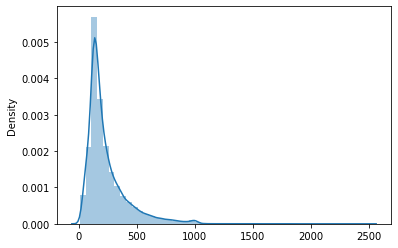

In [ ]:
import seaborn as sns

train_reviews_lens = [len(review) for review in train_reviews]
sns.distplot(train_reviews_lens)

In [ ]:
MAX_REVIEW_LEN = 500

def zero_pad_reviews(train_reviews):
    train_data_padded = []
    for review in train_reviews:
        padded = [0] * MAX_REVIEW_LEN
        stop_index = min(len(review), MAX_REVIEW_LEN)
        padded[:stop_index] = review[:stop_index]
        train_data_padded.append(padded)
    return train_data_padded

train_reviews = zero_pad_reviews(train_reviews)
print(train_reviews[0])

[524, 4, 8, 301, 39, 32, 28639, 5045, 11, 8, 9611, 2384, 67, 18, 8, 876, 1501, 13, 15, 8, 11026, 881, 4, 12414, 2842, 8, 2725, 4079, 2053, 15, 853, 76, 30, 14917, 2529, 7632, 22, 1, 5579, 0, 4, 21, 1535, 7793, 4717, 21, 7888, 12414, 1, 1116, 80, 18, 85, 217, 8040, 1182, 434, 21, 121, 318, 139, 2221, 152, 156, 26, 1, 1593, 190, 31, 853, 139, 1, 29298, 2470, 55, 160, 7478, 1915, 1674, 5, 8, 246, 20156, 14, 8, 2027, 506, 21, 1535, 440, 74, 82, 415, 270, 18, 78, 220, 22182, 22, 582, 354, 107311, 127384, 582, 1570, 10946, 23761, 6, 15679, 16084, 87, 31, 542, 3443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
def review_ints_to_vecs(train_reviews):
    train_data = []
    for review in train_reviews:
        vec_review = [int_to_vec[word] for word in review]
        train_data.append(vec_review)
    return train_data

train_reviews = np.array(review_ints_to_vecs(train_reviews))
print(train_reviews.shape)

(25000, 500, 50)


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

def define_graph():
    OUTPUT_SIZE = 2
    
    X = tf.placeholder(tf.float32, [None, MAX_REVIEW_LEN, EMBEDDING_SIZE])
    Y = tf.placeholder(tf.int32, [None, OUTPUT_SIZE])
    keep_prob = tf.placeholder_with_default(1.0, shape=())
    
    rnn = tf.contrib.rnn.GRUCell(125, activation=tf.nn.relu)
    drop0 = tf.contrib.rnn.DropoutWrapper(rnn, output_keep_prob=keep_prob)
    outputs, final = tf.nn.dynamic_rnn(drop0, X, dtype=tf.float32)
    dense = tf.layers.dense(outputs[:,-1], 100, activation=tf.nn.relu)
    drop1 = tf.layers.dropout(dense, rate=(1-keep_prob))
    logits = tf.layers.dense(drop1, OUTPUT_SIZE, activation=None)
    
    error = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
    loss = tf.reduce_sum(error)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
    
    preds = tf.nn.softmax(logits)
    correct = tf.equal(tf.argmax(preds, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    return X, Y, keep_prob, optimizer, loss, accuracy

TensorFlow 1.x selected.


In [ ]:
permutation = [(i//2)+12500*(i%2) for i in range(len(train_reviews))]
train_reviews = train_reviews[permutation]
train_labels = train_labels[permutation]

In [ ]:

validation_size = 1000
train_size = len(train_reviews) - validation_size

x_train = train_reviews[:train_size]
y_train = train_labels[:train_size]
x_val = train_reviews[train_size:]
y_val = train_labels[train_size:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(24000, 500, 50)
(24000, 2)
(1000, 500, 50)
(1000, 2)


In [ ]:
BATCH_SIZE = 50

num_samples = len(x_train)
num_batches = int(num_samples//BATCH_SIZE)

accT = []
accV = []
from tensorflow.python.framework import ops
ops.reset_default_graph()

X, Y, keep_prob, optimizer, loss, accuracy = define_graph()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(10):
        for i in range(0, num_samples, BATCH_SIZE):
            x_train_batch = x_train[i:i+BATCH_SIZE]
            y_train_batch = y_train[i:i+BATCH_SIZE]
            
            _, train_loss, train_acc = sess.run([optimizer, loss, accuracy],
                                               feed_dict={X:x_train_batch, Y:y_train_batch, keep_prob:0.5})
            
            if (i%1000) == 0:
                val_acc = sess.run(accuracy, feed_dict={X:x_val, Y:y_val})
                print("Epoch {0}:{1:2d}, Train loss: {2:2.2f}, Train acc: {3:.3f}, Val acc: {4:.3f}"
                     .format(epoch, i//1000, train_loss, train_acc, val_acc))
                accT.append(train_acc)
                accV.append(val_acc)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer